<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/PRMC-experimentos/blob/master/src/shift_invariance_in_OLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shift invariance in LP domain

See [this](https://eprints.qut.edu.au/114753/1/Bradley_DICTA03.pdf).

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline
import pywt
from io_stuff import *
from color import *

### Create three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [2]:
%%bash
jupyter nbconvert --to notebook --execute create_moving_circles.ipynb

[NbConvertApp] Converting notebook create_moving_circles.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 86642 bytes to create_moving_circles.nbconvert.ipynb


### Load the images

In [3]:
prefix = "moving_circle_"
frame_0 = load_img(prefix + "000")
frame_1 = load_img(prefix + "001")
frame_2 = load_img(prefix + "002")

### Gaussian Pyramid

In [4]:
# Generate Gaussian pyramid (of 2 levels) for both images
# (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html)

levels = 1

G_000 = frame_0[:,:,0].copy()
G_001 = frame_1[:,:,0].copy()
G_002 = frame_2[:,:,0].copy()
gp_000 = [G_000]
gp_001 = [G_001]
gp_002 = [G_002]
for i in range(levels):
    G_000 = cv2.pyrDown(G_000)
    G_001 = cv2.pyrDown(G_001)
    G_002 = cv2.pyrDown(G_002)
    gp_000.append(G_000)
    gp_001.append(G_001)
    gp_002.append(G_002)
    print(i)
print(len(gp_000))

0
2


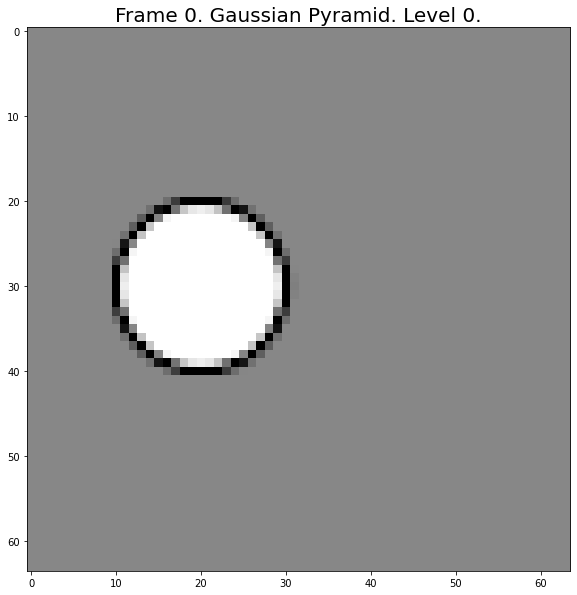

In [5]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Gaussian Pyramid. Level 0.", fontsize=20)
plt.imshow(gp_000[0], cmap="gray")
plt.show()

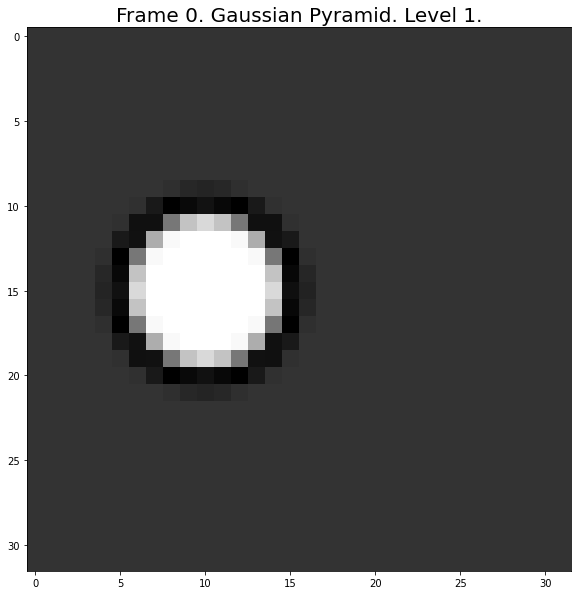

In [6]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. Gaussian Pyramid. Level 1.", fontsize=20)
plt.imshow(gp_000[1], cmap="gray")
plt.show()

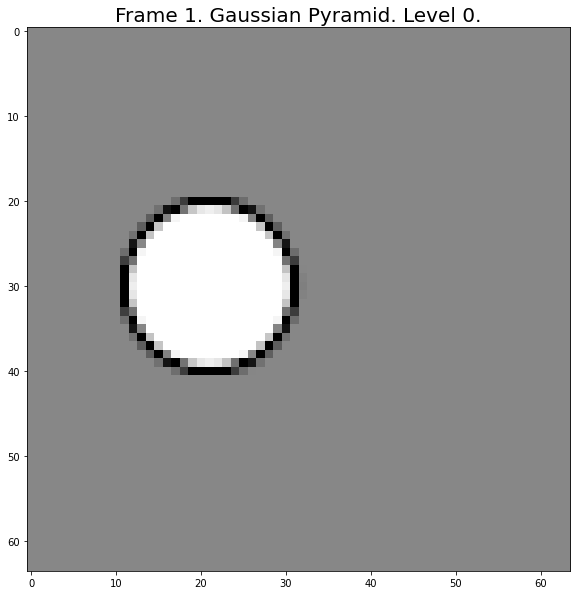

In [7]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Gaussian Pyramid. Level 0.", fontsize=20)
plt.imshow(gp_001[0], cmap="gray")
plt.show()

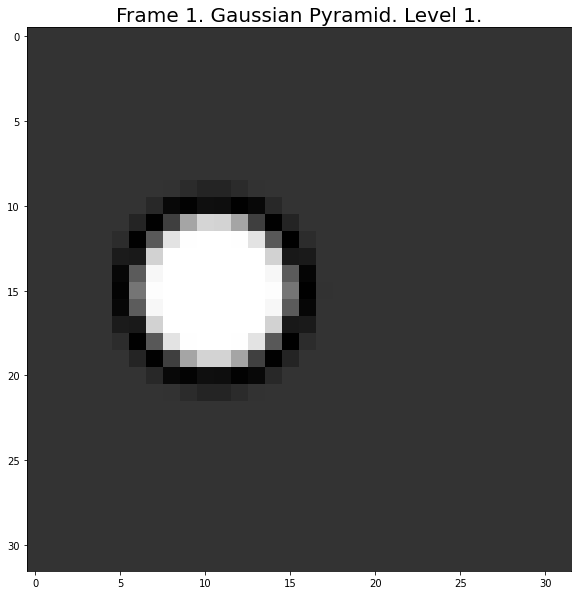

In [8]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. Gaussian Pyramid. Level 1.", fontsize=20)
plt.imshow(gp_001[1], cmap="gray")
plt.show()

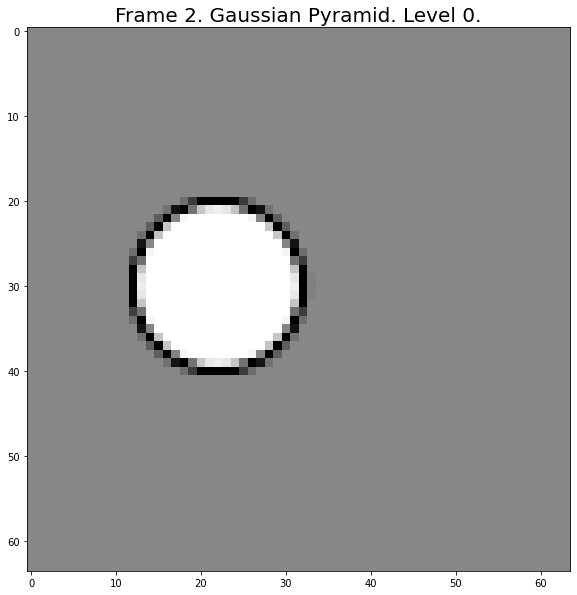

In [9]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Gaussian Pyramid. Level 0.", fontsize=20)
plt.imshow(gp_002[0], cmap="gray")
plt.show()

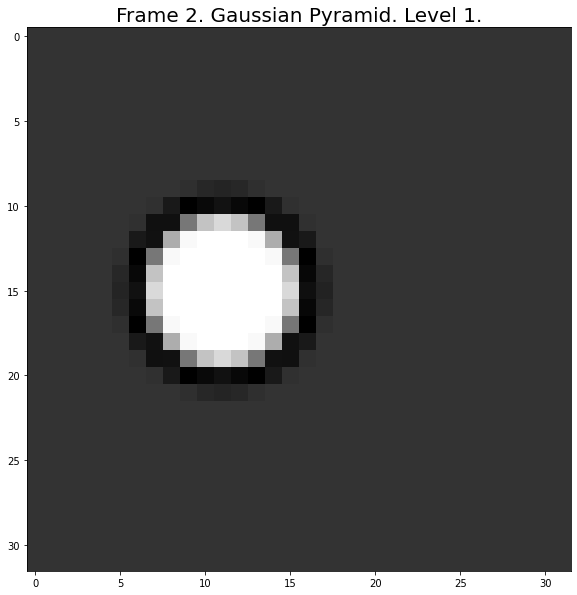

In [10]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. Gaussian Pyramid. Level 1.", fontsize=20)
plt.imshow(gp_002[1], cmap="gray")
plt.show()

### Laplacian Pyramid

In [11]:
# Generate Laplacian Pyramid for both images.
lp_000 = [gp_000[levels]]
lp_001 = [gp_001[levels]]
lp_002 = [gp_002[levels]]
for i in range(levels, 0, -1):
    GE_000 = cv2.pyrUp(gp_000[i])
    GE_001 = cv2.pyrUp(gp_001[i])
    GE_002 = cv2.pyrUp(gp_002[i])
    L_000 = cv2.subtract(gp_000[i-1], GE_000)
    L_001 = cv2.subtract(gp_001[i-1], GE_001)
    L_002 = cv2.subtract(gp_002[i-1], GE_002)
    lp_000.append(L_000)
    lp_001.append(L_001)
    lp_002.append(L_002)
    print(i)

1


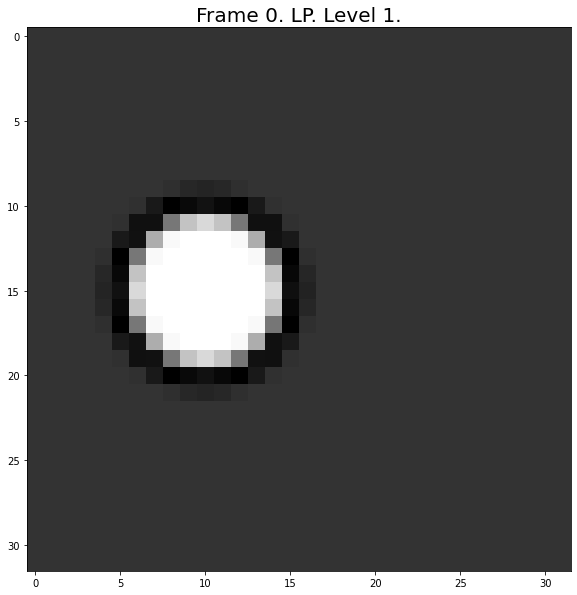

In [12]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. LP. Level 1.", fontsize=20)
plt.imshow(lp_000[0], cmap="gray")
plt.savefig('f0_LP_level1.png')
plt.show()

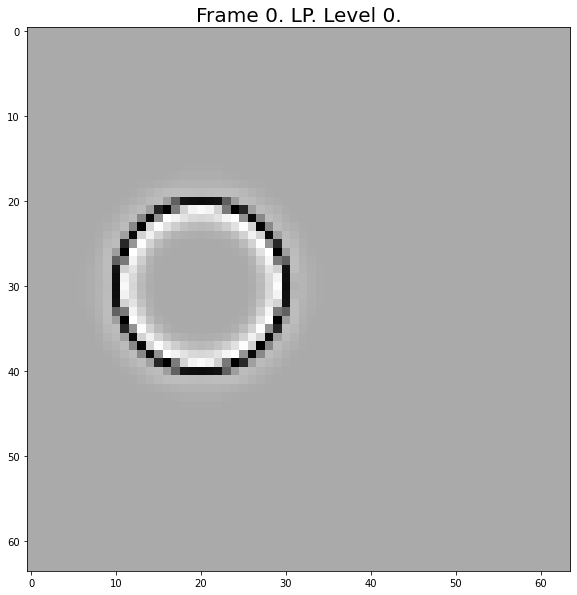

In [13]:
plt.figure(figsize=(10,10))
plt.title("Frame 0. LP. Level 0.", fontsize=20)
plt.imshow(lp_000[1], cmap="gray")
plt.savefig('f0_LP_level0.png')
plt.show()

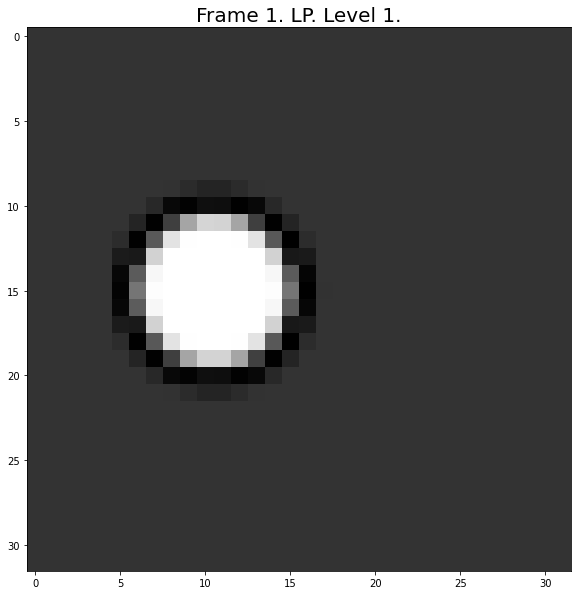

In [14]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. LP. Level 1.", fontsize=20)
plt.imshow(lp_001[0], cmap="gray")
plt.savefig('f1_LP_level1.png')
plt.show()

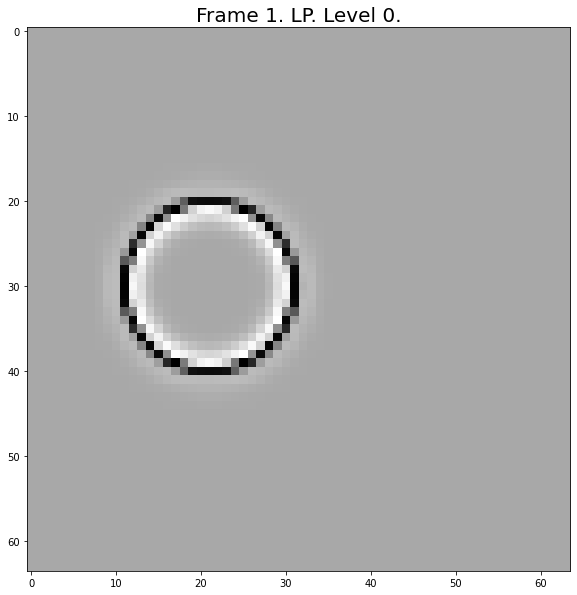

In [15]:
plt.figure(figsize=(10,10))
plt.title("Frame 1. LP. Level 0.", fontsize=20)
plt.imshow(lp_001[1], cmap="gray")
plt.savefig('f1_LP_level0.png')
plt.show()

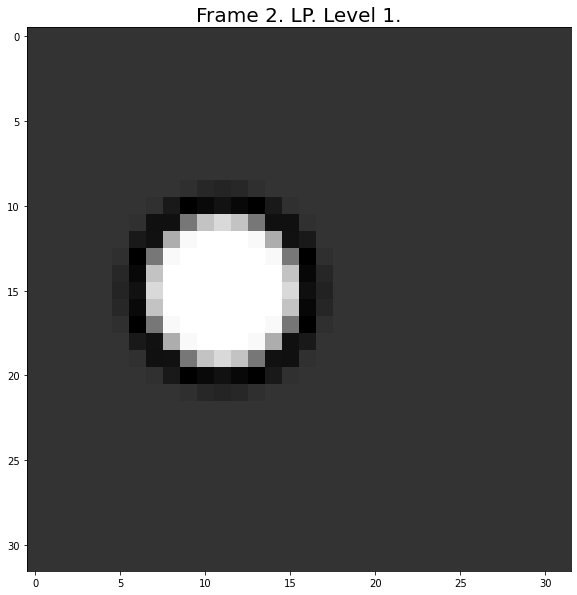

In [16]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. LP. Level 1.", fontsize=20)
plt.imshow(lp_002[0], cmap="gray")
plt.savefig('f2_LP_level1.png')
plt.show()

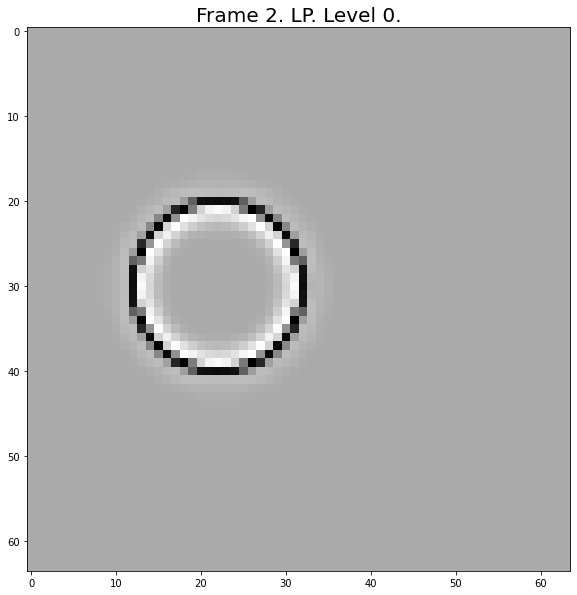

In [17]:
plt.figure(figsize=(10,10))
plt.title("Frame 2. LP. Level 0.", fontsize=20)
plt.imshow(lp_002[1], cmap="gray")
plt.savefig('f2_LP_level0.png')
plt.show()

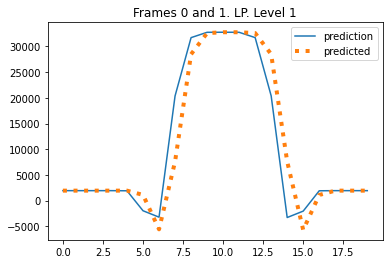

In [18]:
plt.title("Frames 0 and 1. LP. Level 1")
plt.plot(np.roll(lp_000[0][18, 0:20], 0), label="prediction")
plt.plot(lp_001[0][18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_LP_level1.svg")
plt.show()

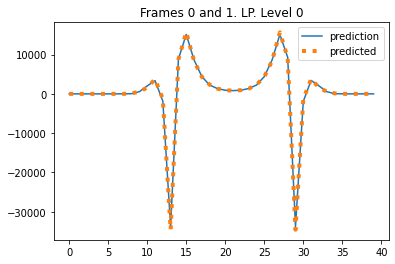

In [19]:
plt.title("Frames 0 and 1. LP. Level 0")
plt.plot(np.roll(lp_000[1][36, 0:40], 1), label="prediction")
plt.plot(lp_001[1][36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_1_LP_level0.svg")
plt.show()

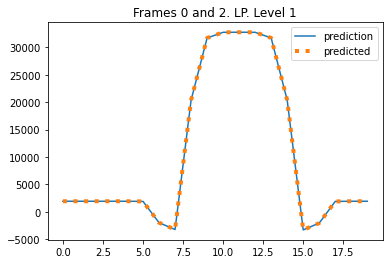

In [20]:
plt.title("Frames 0 and 2. LP. Level 1")
plt.plot(np.roll(lp_000[0][18, 0:20], 1), label="prediction")
plt.plot(lp_002[0][18, 0:20], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_LP_level1.svg")
plt.show()

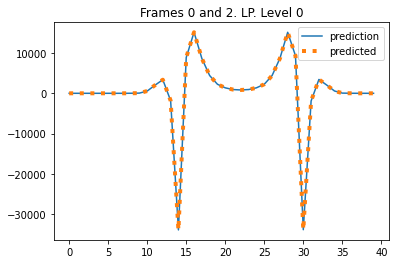

In [21]:
plt.title("Frames 0 and 2. LP. Level 0")
plt.plot(np.roll(lp_000[1][36, 0:40], 2), label="prediction")
plt.plot(lp_002[1][36, 0:40], linestyle=':', linewidth=4, label="predicted")
plt.legend()
plt.savefig("f0_2_LP_level0.svg")
plt.show()

## Ignore the rest ...

## Is $[L]$ subband shift invariant?
A priori, aliasing makes impossible that $[L]$ is shift-invariant.

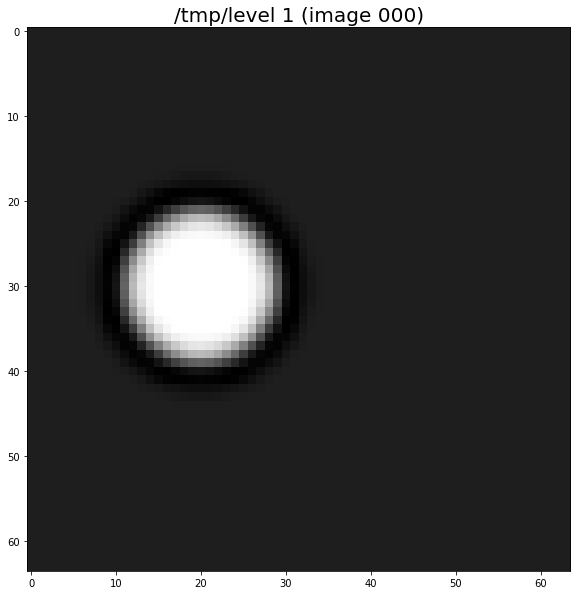

In [22]:
plt.figure(figsize=(10,10))
plt.title("/tmp/level 1 (image 000)", fontsize=20)
plt.imshow(cv2.pyrUp(lp_000[0]), cmap="gray")

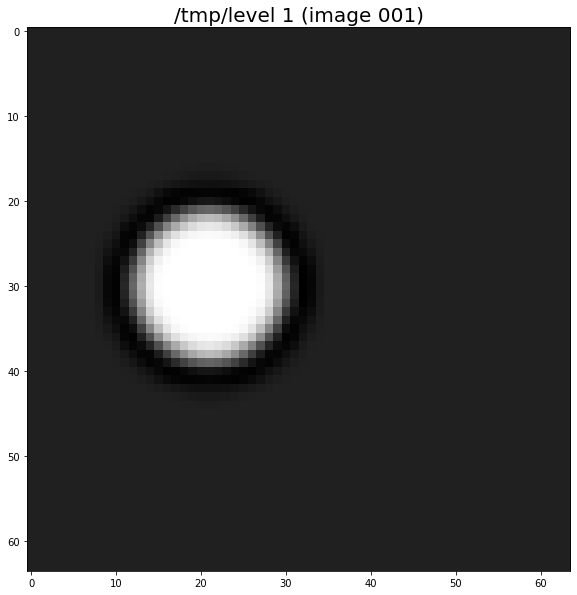

In [23]:
plt.figure(figsize=(10,10))
plt.title("/tmp/level 1 (image 001)", fontsize=20)
plt.imshow(cv2.pyrUp(lp_001[0]), cmap="gray")

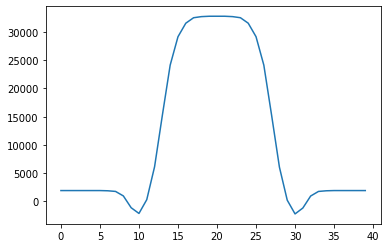

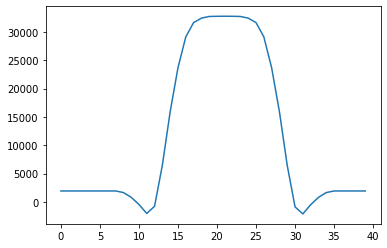

In [24]:
plt.plot(cv2.pyrUp(lp_000[0])[35, 0:40])
plt.show()
plt.plot(cv2.pyrUp(lp_001[0])[35, 0:40])
plt.show()

But it is quite close to being.

## Is $[H]$ subband shift invariant?
If $[L]$ is almost shift invariant,
$$
[H] = I - [L]
$$
where $I$ is the original image, should also be near shift invariant.

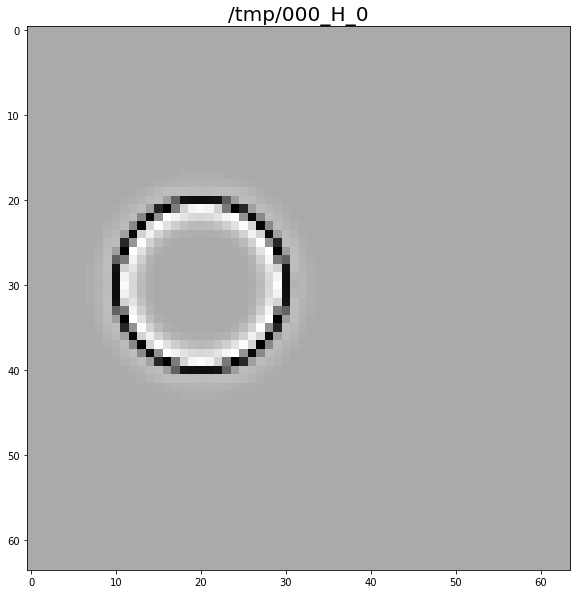

In [25]:
plt.figure(figsize=(10,10))
plt.title("/tmp/000_H_0", fontsize=20)
plt.imshow(lp_000[1], cmap="gray")

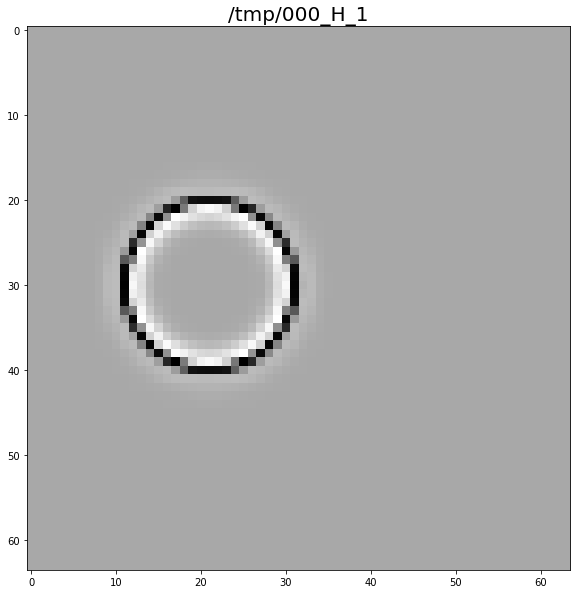

In [26]:
plt.figure(figsize=(10,10))
plt.title("/tmp/000_H_1", fontsize=20)
plt.imshow(lp_001[1], cmap="gray")

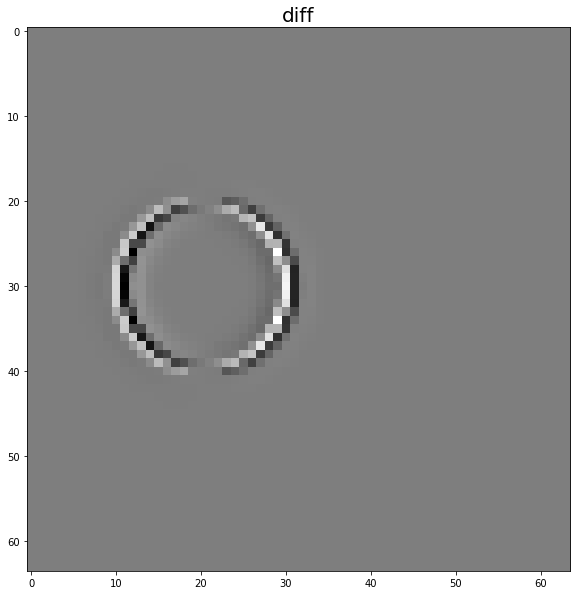

In [27]:
plt.figure(figsize=(10,10))
plt.title("diff", fontsize=20)
plt.imshow(lp_001[1]-lp_000[1], cmap="gray")

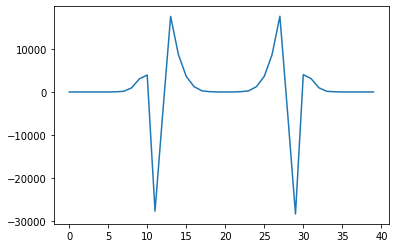

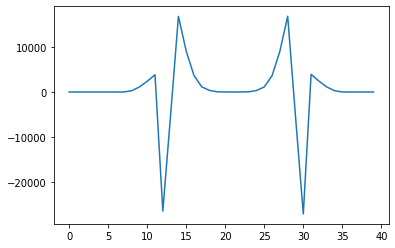

In [28]:
plt.plot(lp_000[1][35, 0:40])
plt.show()
plt.plot(lp_001[1][35, 0:40])
plt.show()

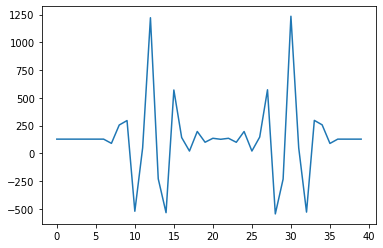

In [29]:
plt.plot(lp_001[1][35, 0:40]-np.roll(lp_000[1][35, 0:40],1)+128)
plt.show()

The $[H]$ subband is also quite close to being shift invariant.